In [1]:
import os
import matplotlib.pyplot as plt

# Set Constants and create result directory

In [2]:
# Experiment directories
EXPERIMENT_DATA = {
    'name': 'CIFAR10_Classification',
    'number': 2,
    'description': ['Basic CNN for CIFAR 10', 'Divide x by 255 for normalization', 'Expect to increase performance']
}

ROOT_DIR = os.getcwd()

# Your directory to save results of experiments
RESULT_DIR = os.path.join(ROOT_DIR, 'drive', 'MyDrive', '1_University', '2021-2', 'Deep_Learning', 'Project')

os.chdir(RESULT_DIR)
curr_result_dir_name = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}"
if (curr_result_dir_name not in os.listdir()):
    os.mkdir(curr_result_dir_name)
CURR_RESULT_DIR = os.path.join(RESULT_DIR, curr_result_dir_name)

# Model Parameters
NUM_CLASS = 10
BATCH_SIZE = 512
EPOCHS = 300

os.chdir(CURR_RESULT_DIR)
with open('README.md', 'wt') as f:
    f.write('# Description of current experiment\n')
    f.write(f'- {curr_result_dir_name}\n')
    for desc in EXPERIMENT_DATA['description']:
        f.write(f"- {desc}\n")
    f.write('\n')

    f.write('# Experiment environment\n')
    f.write('- Colab Environment\n')
    f.write(f'- Epochs: {EPOCHS}\n')
    f.write(f'- Batch Size: {BATCH_SIZE}\n\n')

# Load Data

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train.astype('float32') / 255., x_test.astype('float32') / 255.
y_train, y_test = keras.utils.to_categorical(y_train, NUM_CLASS), keras.utils.to_categorical(y_test, NUM_CLASS)

170508288/170498071 [==============================] - 3s 0us/step


In [5]:
print(f'x_train shape: {x_train.shape}\nx_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}\ny_test shape: {y_test.shape}')

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [6]:
_, HEIGHT, WIDTH, CHANNEL = x_train.shape

# Construct Model

In [7]:
# Use keras functional API
input = layers.Input((HEIGHT, WIDTH, CHANNEL), name = 'Input layer')

x = layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(input)
x = layers.MaxPooling2D((3, 3), (2, 2), padding = 'same')(x)

x = layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(x)
x = layers.MaxPooling2D((3, 3), (2, 2), padding = 'same')(x)

x = layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(x)
x = layers.MaxPooling2D((3, 3), (2, 2), padding = 'same')(x)

x = layers.Flatten()(x)
output = layers.Dense(NUM_CLASS, activation = 'softmax')(x)

In [8]:
model = keras.Model(input, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          9248  

In [9]:
keras.utils.plot_model(model, show_shapes = True)
with open('README.md', 'a') as f:
    f.write('# Model information\n')
    f.write('- [Model Plots](model.png)\n\n')

In [10]:
model.compile(optimizer = keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['acc'])

In [11]:
history = model.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (x_test, y_test))

Epoch 1/300
98/98 [==============================] - 14s 35ms/step - loss: 1.9345 - acc: 0.3100 - val_loss: 1.6763 - val_acc: 0.4096
Epoch 2/300
98/98 [==============================] - 3s 28ms/step - loss: 1.5647 - acc: 0.4381 - val_loss: 1.4807 - val_acc: 0.4708
Epoch 3/300
98/98 [==============================] - 3s 28ms/step - loss: 1.4150 - acc: 0.4948 - val_loss: 1.3540 - val_acc: 0.5145
Epoch 4/300
98/98 [==============================] - 3s 28ms/step - loss: 1.3325 - acc: 0.5261 - val_loss: 1.3261 - val_acc: 0.5303
Epoch 5/300
98/98 [==============================] - 3s 27ms/step - loss: 1.2678 - acc: 0.5527 - val_loss: 1.2687 - val_acc: 0.5549
Epoch 6/300
98/98 [==============================] - 3s 28ms/step - loss: 1.2185 - acc: 0.5726 - val_loss: 1.2170 - val_acc: 0.5700
Epoch 7/300
98/98 [==============================] - 3s 28ms/step - loss: 1.1877 - acc: 0.5849 - val_loss: 1.1981 - val_acc: 0.5818
Epoch 8/300
98/98 [==============================] - 3s 27ms/step - loss: 1

# Plot Results

In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.1398 - acc: 0.7287


In [32]:
with open('README.md', 'a') as f:
    f.write('# Results\n')

    f.write('## Loss\n')
    f.write(f'- Train Loss: {history.history["loss"][-1]:.4f}\n')
    f.write(f'- Test Loss: {test_loss:.4f}\n\n')

    f.write('## Accuracy\n')
    f.write(f'- Train Accuracy: {history.history["acc"][-1] * 100:.2f}%\n')
    f.write(f'- Test Accuracy: {test_acc * 100:.2f}%\n')

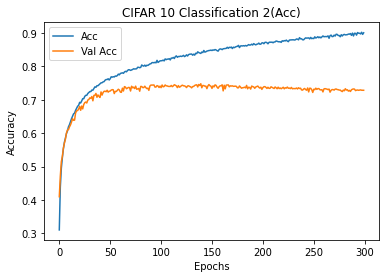

In [34]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc', 'Val Acc'])
plt.title(f'CIFAR 10 Classification {EXPERIMENT_DATA["number"]}(Acc)')

plt.savefig('Accuracy Result.png')
plt.show()

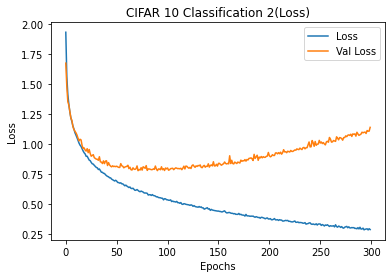

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Val Loss'])
plt.title(f'CIFAR 10 Classification {EXPERIMENT_DATA["number"]}(Loss)')

plt.savefig('Loss Result.png')
plt.show()